# Importing the modules

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation 

## Loading the dataset

In [68]:
df_o = pd.read_csv('Fuel.csv')
df_o.tail(1)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


## Ploting the graph

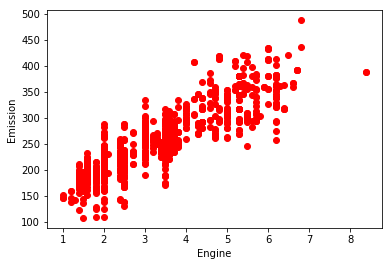

In [20]:
df = df[['ENGINESIZE','CO2EMISSIONS']]
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS, color="red")
plt.xlabel("Engine")
plt.ylabel("Emission")
plt.show()

## Splitting the train and test dataset

In [112]:
# transforming the Engine and Emission column to numpy array 
x = np.array(df[['ENGINESIZE']])
y = np.array(df[['CO2EMISSIONS']])
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y, test_size=0.2)
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((853, 1), (214, 1), (214, 1), (853, 1))

## Training and predicting

In [116]:
classifier = LinearRegression()
trained = classifier.fit(x_train,y_train)
predicted_y = classifier.predict(x_test)

## Plotting the graph with best fit line

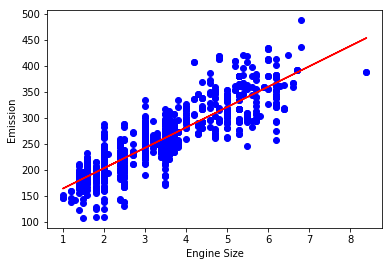

In [117]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS, color='b')
plt.plot(x_train,classifier.coef_[0][0] * x_train + classifier.intercept_[0],'-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

## Accuracy of the model

In [115]:
from sklearn.metrics import r2_score
accuracy = r2_score(predicted_y,y_test)
print(accuracy)

0.7297896098129144


## Predicted vs Test DataFrame

In [111]:
i = pd.DataFrame(y_test)
idf['Predicted_y'] = pd.DataFrame(predicted_y)
idf['Test'] = i
idf.head()

,Predicted_y,Test
0,250.544517,242
1,266.405405,308
2,202.961853,209
3,270.370627,288
4,306.057625,329
